In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df['total_runs'] = total_score_df['total_runs'] + 1

In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [11]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
match_df.shape

(756, 20)

In [14]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [15]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [16]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(641, 20)

In [18]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [19]:
match_df = match_df[match_df['dl_applied'] == 0]

In [20]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [21]:
delivery_df = match_df.merge(delivery,on='match_id')

In [22]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [23]:
delivery_df.shape

(72413, 24)

In [24]:
delivery_df['current_score'] = delivery_df.groupby(['match_id']).cumsum()['total_runs_y']

In [25]:
delivery_df['run_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [26]:
delivery_df['ball_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [27]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,run_left,ball_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [28]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,run_left,ball_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [29]:
delivery_df['crr'] = (delivery_df['current_score'] * 6)/(120 - delivery_df['ball_left']) 

In [30]:
delivery_df.sample(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,run_left,ball_left,wickets_left,crr
123873,7904,Bengaluru,Rajasthan Royals,232,2,Royal Challengers Bangalore,Rajasthan Royals,15,5,Washington Sundar,...,1,2,0,NaN,NaN,137,95,31,5,9.235955
7484,61,Chandigarh,Chennai Super Kings,241,2,Kings XI Punjab,Chennai Super Kings,15,6,KC Sangakkara,...,0,6,0,NaN,NaN,165,76,30,7,11.000000
7976,63,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,2,B Akhil,...,1,1,0,NaN,NaN,165,1,4,5,8.534483
125555,7912,Bengaluru,Royal Challengers Bangalore,187,2,Royal Challengers Bangalore,Delhi Daredevils,13,2,AB de Villiers,...,0,4,0,NaN,NaN,109,78,46,7,8.837838
32314,170,Centurion,Delhi Daredevils,166,2,Delhi Daredevils,Mumbai Indians,12,2,V Sehwag,...,0,1,0,NaN,NaN,105,61,52,8,9.264706


In [31]:
delivery_df['rrr'] = (delivery_df['run_left']*6)/delivery_df['ball_left']

In [32]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,run_left,ball_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [33]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [34]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [35]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,run_left,ball_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0


In [36]:
final_df = delivery_df[['batting_team','bowling_team','city','run_left','ball_left','wickets_left','total_runs_x','crr','rrr','result']]

In [37]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,run_left,ball_left,wickets_left,total_runs_x,crr,rrr,result
52373,Royal Challengers Bangalore,Delhi Daredevils,Delhi,2,5,3,161,8.295652,2.400000,1
103417,Delhi Daredevils,Kings XI Punjab,Pune,16,17,8,166,8.737864,5.647059,1
32314,Delhi Daredevils,Mumbai Indians,Centurion,61,52,8,166,9.264706,7.038462,1
64724,Chennai Super Kings,Kings XI Punjab,Chennai,85,56,7,157,6.750000,9.107143,0
32326,Delhi Daredevils,Mumbai Indians,Centurion,32,41,8,166,10.177215,4.682927,1
...,...,...,...,...,...,...,...,...,...,...
40272,Rajasthan Royals,Delhi Daredevils,Delhi,182,110,8,189,4.200000,9.927273,0
80015,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,41,38,8,130,6.512195,6.473684,1
72437,Kolkata Knight Riders,Delhi Daredevils,Kolkata,78,80,9,129,7.650000,5.850000,1
23999,Mumbai Indians,Kings XI Punjab,Durban,91,75,7,120,3.866667,7.280000,0


In [38]:
final_df.sample(5)

,batting_team,bowling_team,city,run_left,ball_left,wickets_left,total_runs_x,crr,rrr,result
14058,Rajasthan Royals,Deccan Chargers,Jaipur,30,41,9,141,8.430380,4.390244,1
32272,Delhi Daredevils,Mumbai Indians,Centurion,122,92,9,166,9.428571,7.956522,1
74189,Chennai Super Kings,Kings XI Punjab,Chandigarh,77,63,10,139,6.526316,7.333333,1
57864,Mumbai Indians,Kolkata Knight Riders,Mumbai,28,29,6,148,7.912088,5.793103,1
33530,Deccan Chargers,Kolkata Knight Riders,Mumbai,56,45,7,162,8.480000,7.466667,0


In [39]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
run_left          0
ball_left         0
wickets_left      0
total_runs_x      0
crr               0
rrr               5
result            0
dtype: int64

In [40]:
# replace infinite values with NaN
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# fill NaN values with the previous value along the columns
final_df.fillna(method='ffill', axis=0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26568\2225974823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26568\2225974823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.fillna(method='ffill', axis=0, inplace=True)


In [41]:
final_df['city'].mode()

0    Mumbai
Name: city, dtype: object

In [42]:
final_df[final_df['ball_left'] == 0]

,batting_team,bowling_team,city,run_left,ball_left,wickets_left,total_runs_x,crr,rrr,result
495,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,16,0,1,158,7.10,102.0,0
1927,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,18,0,4,173,7.75,114.0,0
2175,Kings XI Punjab,Delhi Daredevils,Delhi,52,0,1,189,6.85,312.0,0
2669,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,6,0,0,160,7.70,36.0,0
2914,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,16,0,5,192,8.80,102.0,0
...,...,...,...,...,...,...,...,...,...,...
146654,Mumbai Indians,Kolkata Knight Riders,Kolkata,38,0,3,242,10.20,234.0,0
146911,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,59,0,2,233,8.70,360.0,0
147429,Sunrisers Hyderabad,Mumbai Indians,Mumbai,6,0,4,171,8.25,72.0,0
149090,Delhi Capitals,Sunrisers Hyderabad,Visakhapatnam,2,0,3,172,8.50,36.0,1


In [43]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
run_left        0
ball_left       0
wickets_left    0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
final_df.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26568\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [46]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [48]:
x_train.head(4)

,batting_team,bowling_team,city,run_left,ball_left,wickets_left,total_runs_x,crr,rrr
77831,Delhi Daredevils,Kings XI Punjab,Dharamsala,65,26,6,172,6.829787,15.000000
68056,Chennai Super Kings,Rajasthan Royals,Jaipur,126,114,9,127,1.000000,6.631579
7008,Mumbai Indians,Kolkata Knight Riders,Bangalore,45,63,7,108,6.631579,4.285714
130876,Sunrisers Hyderabad,Delhi Daredevils,Delhi,115,69,9,191,8.941176,10.000000


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
trf = ColumnTransformer([
    ("trf",OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [52]:
x_train.describe()

,run_left,ball_left,wickets_left,total_runs_x,crr,rrr
count,57930.000000,57930.000000,57930.000000,57930.000000,57930.000000,57930.000000
mean,93.172674,62.625255,7.536872,166.523977,7.438376,10.955358
std,50.030096,33.371051,2.134654,29.379999,2.278181,17.262614
min,-11.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000
25%,54.000000,35.000000,6.000000,147.000000,6.253700,7.255814
50%,92.000000,63.000000,8.000000,166.000000,7.475410,9.000000
75%,131.000000,91.000000,9.000000,186.000000,8.689655,11.044248
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000


In [53]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [54]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [55]:
y_pred = pipe.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred)

0.8053580059379962

In [61]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','run_left','ball_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['ball_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['run_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [64]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,58.1,41.9
10467,2,8,0,52.4,47.6
10473,3,1,0,59.7,40.3
10479,4,7,1,70.9,29.1
10485,5,12,0,60.6,39.4
10491,6,13,0,48.1,51.9
10497,7,9,0,42.1,57.9
10505,8,15,0,27.9,72.1
10511,9,7,0,25.8,74.2
10518,10,17,0,14.0,86.0


Text(0.5, 1.0, 'Target-179')

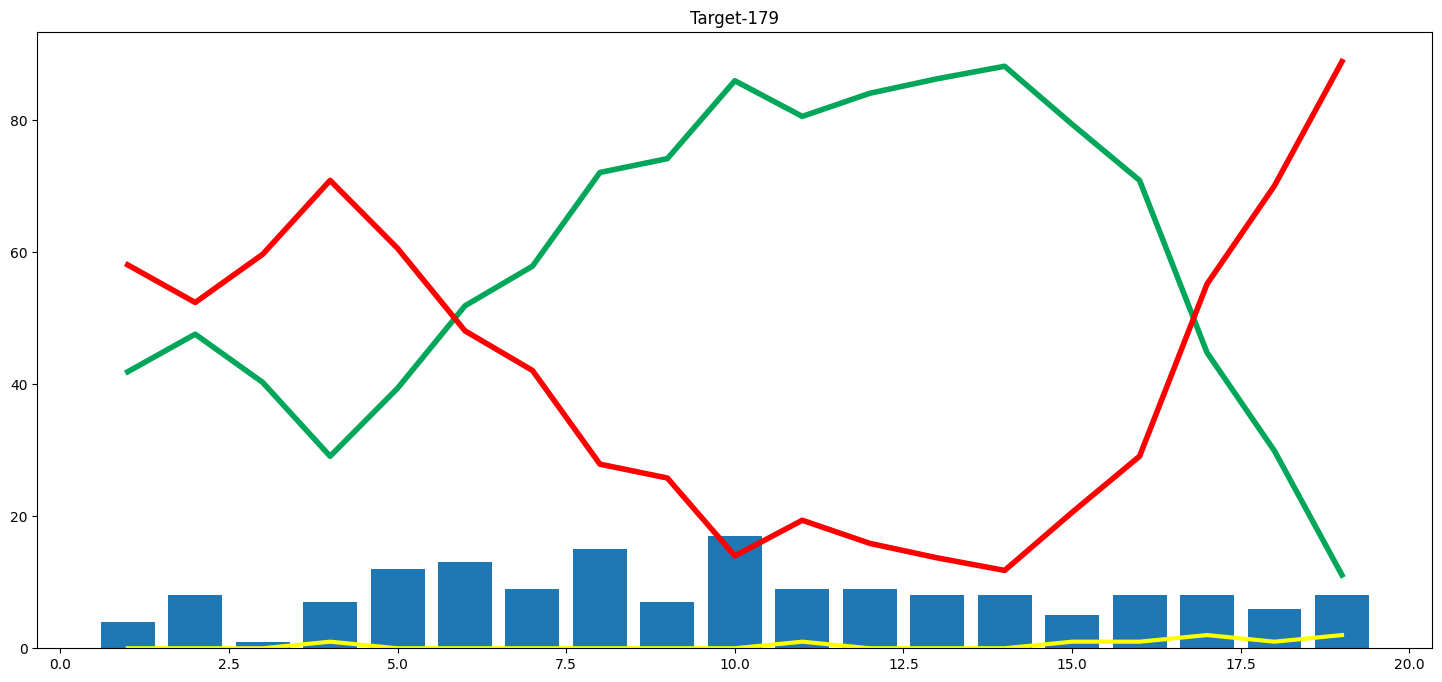

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [66]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [69]:

delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [70]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [71]:
final_df.dtypes

batting_team     object
bowling_team     object
city             object
run_left          int64
ball_left         int64
wickets_left      int32
total_runs_x      int64
crr             float64
rrr             float64
result            int64
dtype: object